In [16]:
# Install required packages
!pip install yfinance 
!pip install pandas
!pip install torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import yfinance as yf




Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable



--- Training with Adam Optimizer and OneCycleLR Scheduler ---


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.0568 - mse: 1.0568 - val_loss: 1.7745 - val_mse: 1.7745
Epoch 2/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9131 - mse: 0.9131 - val_loss: 1.7621 - val_mse: 1.7621
Epoch 3/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8770 - mse: 0.8770 - val_loss: 1.7502 - val_mse: 1.7502
Epoch 4/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8854 - mse: 0.8854 - val_loss: 1.7350 - val_mse: 1.7350
Epoch 5/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8755 - mse: 0.8755 - val_loss: 1.7082 - val_mse: 1.7082
Epoch 6/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8035 - mse: 0.8035 - val_loss: 1.6807 - val_mse: 1.6807
Epoch 7/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7145 - mse: 0.7145 - val_loss: 1.6477 - val_mse: 1.6477
Epoch 8/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7311 - mse: 0.7311 - val_loss: 1.6087 - val_mse: 1.6087
Epoch 9/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.73

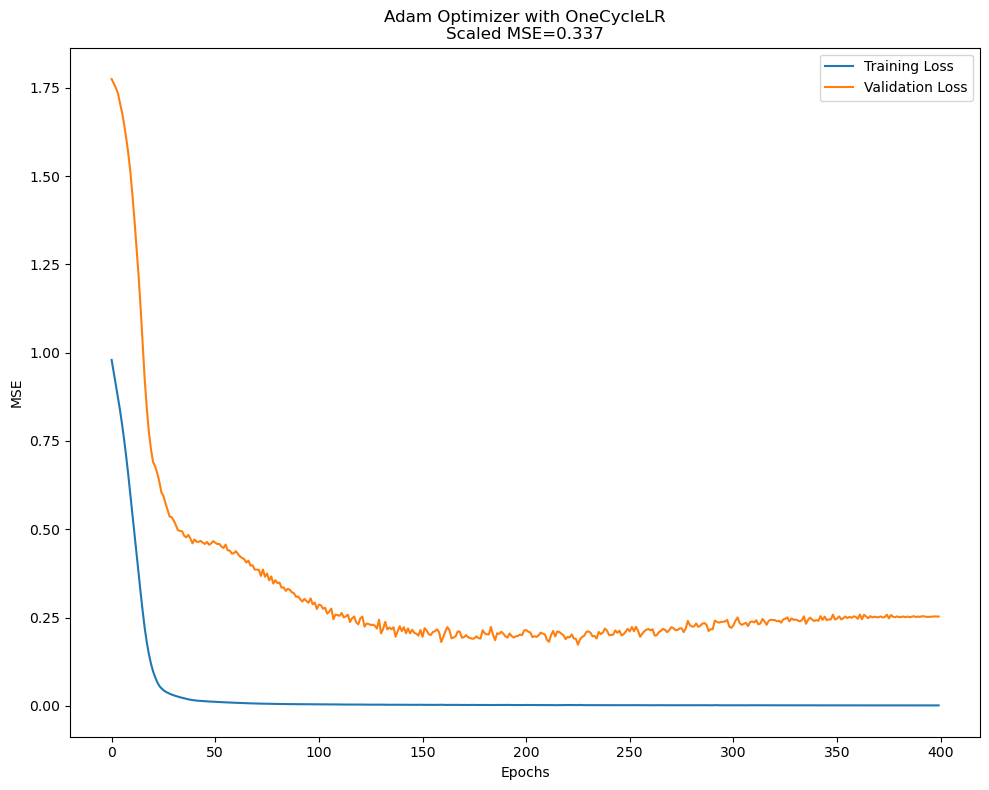


Final Evaluation Summary:
Adam Optimizer with OneCycleLR: Final Test MSE (Original Scale) = 1175.55


In [17]:


# --- Data Setup ---
feature_stocks = ['tsla', 'meta', 'goog', 'amzn', 'nflx', 'gbtc', 'gdx', 'intc', 'dal', 'c']
predict_stock = 'msft'

def get_stock_data(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            ticker_data = yf.Ticker(ticker).history(start=start_date, end=end_date)['Close']
            if ticker_data.isnull().any():
                print(f"Warning: Missing data found for {ticker}.")
            data[ticker] = ticker_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data.dropna()

# Define date ranges
start_train, end_train = '2023-01-01', '2024-06-30'
start_val, end_val = '2024-07-01', '2024-10-31'
start_test, end_test = '2024-11-01', '2024-12-31'

# Load data
X_train_df = get_stock_data(feature_stocks, start_train, end_train)
y_train_df = get_stock_data([predict_stock], start_train, end_train)

X_val_df = get_stock_data(feature_stocks, start_val, end_val)
y_val_df = get_stock_data([predict_stock], start_val, end_val)

X_test_df = get_stock_data(feature_stocks, start_test, end_test)
y_test_df = get_stock_data([predict_stock], start_test, end_test)

# Convert DataFrames to NumPy Arrays
X_train_raw = X_train_df.values.astype('float32')
y_train_raw = y_train_df.values.reshape(-1, 1).astype('float32')

X_val_raw = X_val_df.values.astype('float32')
y_val_raw = y_val_df.values.reshape(-1, 1).astype('float32')

X_test_raw = X_test_df.values.astype('float32')
y_test_raw = y_test_df.values.reshape(-1, 1).astype('float32')

# Scale Data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train_raw)
y_train = scaler_y.fit_transform(y_train_raw)

X_val = scaler_X.transform(X_val_raw)
y_val = scaler_y.transform(y_val_raw)

X_test = scaler_X.transform(X_test_raw)
y_test = scaler_y.transform(y_test_raw)

# --- Model Definition ---
def build_model(input_size=10):
    model = keras.Sequential([
        keras.Input(shape=(input_size,)),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)  # single output for regression
    ])
    model.summary()
    return model

# --- Helper Function to Ensure Learning Rate is a Variable ---
def ensure_lr_variable(lr):
    if not hasattr(lr, 'assign'):
        return tf.Variable(lr, dtype=tf.float32)
    return lr

# --- Custom Learning Rate Schedulers ---
# Custom CyclicLR callback (triangular policy)
class CyclicLR(tf.keras.callbacks.Callback):
    def __init__(self, base_lr=1e-6, max_lr=1e-3, step_size=2000., mode='triangular'):
        super(CyclicLR, self).__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.clr_iterations = 0.
        self.history = {}

    def clr(self):
        cycle = np.floor(1 + self.clr_iterations / (2 * self.step_size))
        x = np.abs(self.clr_iterations / self.step_size - 2 * cycle + 1)
        lr_delta = (self.max_lr - self.base_lr) * max(0, (1 - x))
        return self.base_lr + lr_delta

    def on_train_begin(self, logs=None):
        logs = logs or {}
        self.model.optimizer.learning_rate = ensure_lr_variable(self.model.optimizer.learning_rate)
        # FIX: Use .assign instead of tf.keras.backend.set_value
        self.model.optimizer.learning_rate.assign(self.base_lr)

    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        self.clr_iterations += 1
        lr = self.clr()
        self.model.optimizer.learning_rate = ensure_lr_variable(self.model.optimizer.learning_rate)
        # FIX: Use .assign here as well
        self.model.optimizer.learning_rate.assign(lr)
        self.history.setdefault('lr', []).append(lr)
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

# Custom OneCycleLR callback
class OneCycleLR(tf.keras.callbacks.Callback):
    def __init__(self, max_lr, epochs, steps_per_epoch, start_lr=None, last_lr=None):
        super(OneCycleLR, self).__init__()
        self.max_lr = max_lr
        self.epochs = epochs
        self.steps_per_epoch = steps_per_epoch
        self.total_steps = epochs * steps_per_epoch
        self.start_lr = start_lr if start_lr is not None else max_lr / 10
        self.last_lr = last_lr if last_lr is not None else self.start_lr / 100
        self.iteration = 0

    def lr_schedule(self):
        if self.iteration < self.total_steps / 2:
            # Increase linearly from start_lr to max_lr
            lr = self.start_lr + (self.max_lr - self.start_lr) * (self.iteration / (self.total_steps / 2))
        else:
            # Decrease linearly from max_lr to last_lr
            lr = self.max_lr - (self.max_lr - self.last_lr) * ((self.iteration - self.total_steps / 2) / (self.total_steps / 2))
        return lr

    def on_train_begin(self, logs=None):
        logs = logs or {}
        self.model.optimizer.learning_rate = ensure_lr_variable(self.model.optimizer.learning_rate)
        # FIX: Use .assign to update the learning rate variable
        self.model.optimizer.learning_rate.assign(self.start_lr)

    def on_batch_end(self, batch, logs=None):
        self.iteration += 1
        lr = self.lr_schedule()
        self.model.optimizer.learning_rate = ensure_lr_variable(self.model.optimizer.learning_rate)
        # FIX: Use .assign instead of tf.keras.backend.set_value here as well
        self.model.optimizer.learning_rate.assign(lr)

# --- Scheduler Selection ---
# Built-in ReduceLROnPlateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# Instantiate custom callbacks (adjust base/max LR as needed)
cyclic_lr = CyclicLR(base_lr=1e-6, max_lr=1e-3, step_size=2000.)
# Set batch_size and epochs to compute steps_per_epoch for OneCycleLR
batch_size = 32
epochs = 400
steps_per_epoch = int(np.ceil(len(X_train) / batch_size))
one_cycle_lr = OneCycleLR(max_lr=1e-3, epochs=epochs, steps_per_epoch=steps_per_epoch)

# Choose which scheduler to use: "OneCycleLR", "CyclicLR", or "ReduceLROnPlateau"
scheduler_choice = "OneCycleLR"  # Change this to "CyclicLR" or "ReduceLROnPlateau" as desired
scheduler_callbacks_dict = {
    "OneCycleLR": [one_cycle_lr],
    "CyclicLR": [cyclic_lr],
    "ReduceLROnPlateau": [reduce_lr]
}
scheduler_callbacks = scheduler_callbacks_dict[scheduler_choice]

# --- Training Loop Using Only Adam Optimizer ---
histories = {}
test_mses_scaled = {}
test_mses_original = {}
y_std = scaler_y.scale_[0]
custom_input_size = X_train.shape[1]  # dynamic input size

plt.figure(figsize=(10, 8))

print(f"\n--- Training with Adam Optimizer and {scheduler_choice} Scheduler ---")
optimizer_instance = keras.optimizers.Adam(learning_rate=1e-6)
model = build_model(input_size=custom_input_size)
model.compile(loss='mse', optimizer=optimizer_instance, metrics=['mse'])

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=scheduler_callbacks,
    verbose=1
)

histories['Adam'] = history

train_loss_list = history.history['loss']
val_loss_list = history.history['val_loss']
for epoch_num, (train_loss_val, val_loss_val) in enumerate(zip(train_loss_list, val_loss_list), start=1):
    print(f"Epoch {epoch_num}: Train Loss = {train_loss_val:.4f} | Validation Loss = {val_loss_val:.4f}")

mse_test_scaled = float(model.evaluate(X_test, y_test, verbose=0)[0])
mse_test_original = mse_test_scaled * (y_std ** 2)

test_mses_scaled['Adam'] = mse_test_scaled
test_mses_original['Adam'] = mse_test_original

print(f"Test MSE (scaled) with Adam: {mse_test_scaled:.2f}")
print(f"Test MSE (original) with Adam: {mse_test_original:.2f}")

# Plot training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.title(f"Adam Optimizer with {scheduler_choice}\nScaled MSE={mse_test_scaled:.3f}")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.show()

# --- Final Evaluation Summary ---
print("\nFinal Evaluation Summary:")
print(f"Adam Optimizer with {scheduler_choice}: Final Test MSE (Original Scale) = {test_mses_original['Adam']:.2f}")
